# Model Definition and Evaluation
## Table of Contents
1. [Model Selection](#1-model-selection)
2. [Implementation](#2-implementation)
3. [Evaluation](#3-evaluation)
4. [Comparative Analysis](#4-comparative-analysis)

In [1]:
from Eval import plot_training_history, display_final_metrics, plot_model_predictions


## 1. Model Selection
We selected the U-Net architecture because its encoder-decoder structure and skip connections are specifically designed for grid-to-grid mapping. Since Sea Surface Temperature (SST) fields are characterized by high spatial correlation, the U-Net is ideal for capturing both broad thermal gradients and localized mesoscale features—such as eddies and fronts—common in the Cape Verde region.

The use of skip connections is technically vital; they pass high-resolution spatial information directly from the contracting path to the expanding path, ensuring that sharp temperature gradients are not lost during the downsampling process. For this phase, the 2D U-Net provides a computationally efficient and transparent baseline. It allows us to establish a clear performance benchmark for purely sequential mapping before we move toward more complex architectural upgrades like attention mechanisms or 3D convolutions in future iterations of this project.

## 2. Implementation
The project is implemented using a modular data and training pipeline. While the specific model backbones are withheld due to authorship and licensing constraints, the repository provides the full infrastructure required for dataset processing and model orchestration.

A configuration-driven approach using Hydra is employed to manage the experimental setup. This framework allows for seamless transitions between different model versions, hyperparameters, and project phases by modifying centralized YAML files. This modularity ensures that the baseline 2D U-Net can be easily compared against future architectural iterations within a consistent and reproducible execution environment.

## 3. Evaluation
To identify the most effective architecture for regional SST forecasting, we evaluated four distinct iterations of the U-Net:

**Baseline U-Net:** A standard 2D encoder-decoder configuration designed for direct pixel-to-pixel mapping.

**Residual Predictor:** An architecture modified to predict only the temperature delta (residual) between consecutive time steps, focusing the learning process on dynamic changes rather than static state persistence.

**Boundary-Aware Residual:** Building on the residual version, this iteration incorporates a mechanism to specifically handle land-mask edges. By upweighting boundary pixels within the convolutional layers, the model is forced to better resolve the complex thermal gradients occurring at the land-sea interface.

**Deep Residual:** An expanded version of the residual model featuring an additional layer in the hierarchy, increasing the network's depth to capture higher-level spatial abstractions and broader contextual information.

### 3.1 Baseline U-Net

In [ ]:
import os

# Set the base directory where your run outputs are stored.
# Each model variant has its own subfolder containing:
#   - a Lightning CSV log file (training history)
#   - a metrics CSV file (final test-set metrics)
#   - a predictions NetCDF file (ground truth vs. prediction arrays)
RUNS_DIR = os.path.join('..', 'runs')  # adjust this path to your runs folder

file_paths_1 = {
    'training':    os.path.join(RUNS_DIR, 'baseline_unet', 'metrics.csv'),
    'metrics':     os.path.join(RUNS_DIR, 'baseline_unet', 'final_metrics.csv'),
    'predictions': os.path.join(RUNS_DIR, 'baseline_unet', 'predictions.nc'),
}


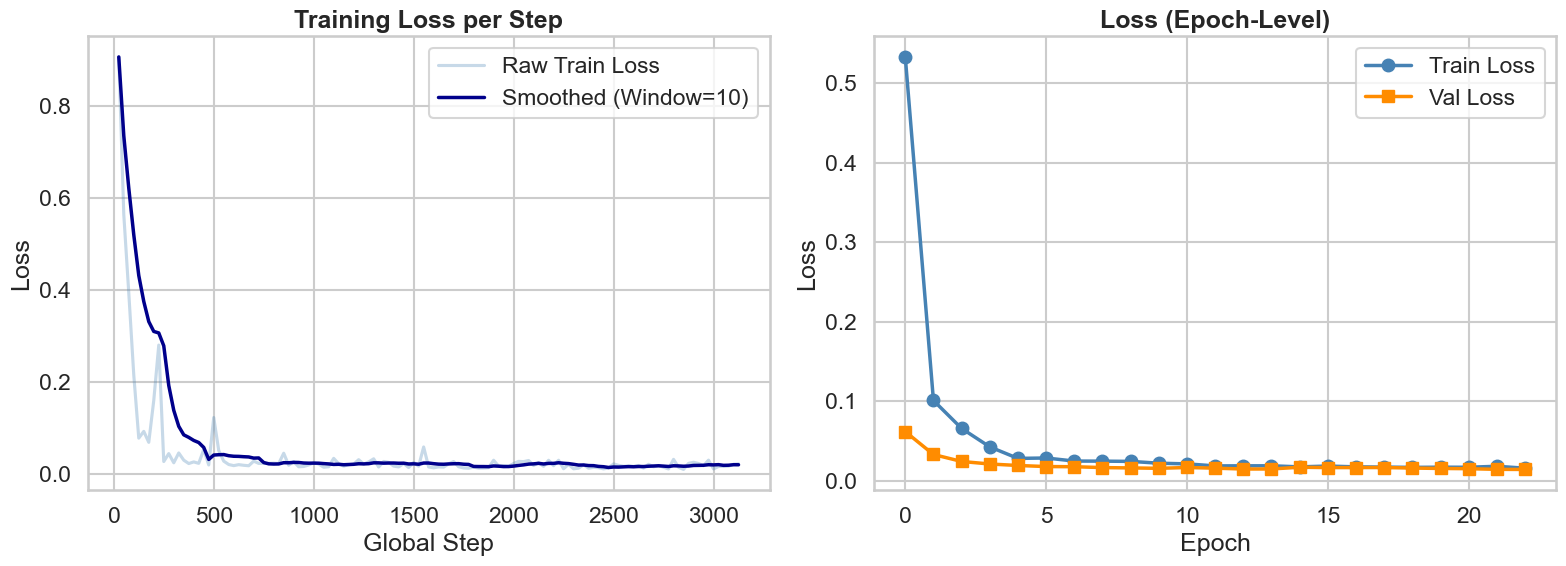

          FINAL EVALUATION METRICS           
norm_mse                  |          0.0142
norm_rmse                 |          0.1193
phys_mse                  |          0.1011
phys_rmse                 |          0.3179
n_samples                 |             271


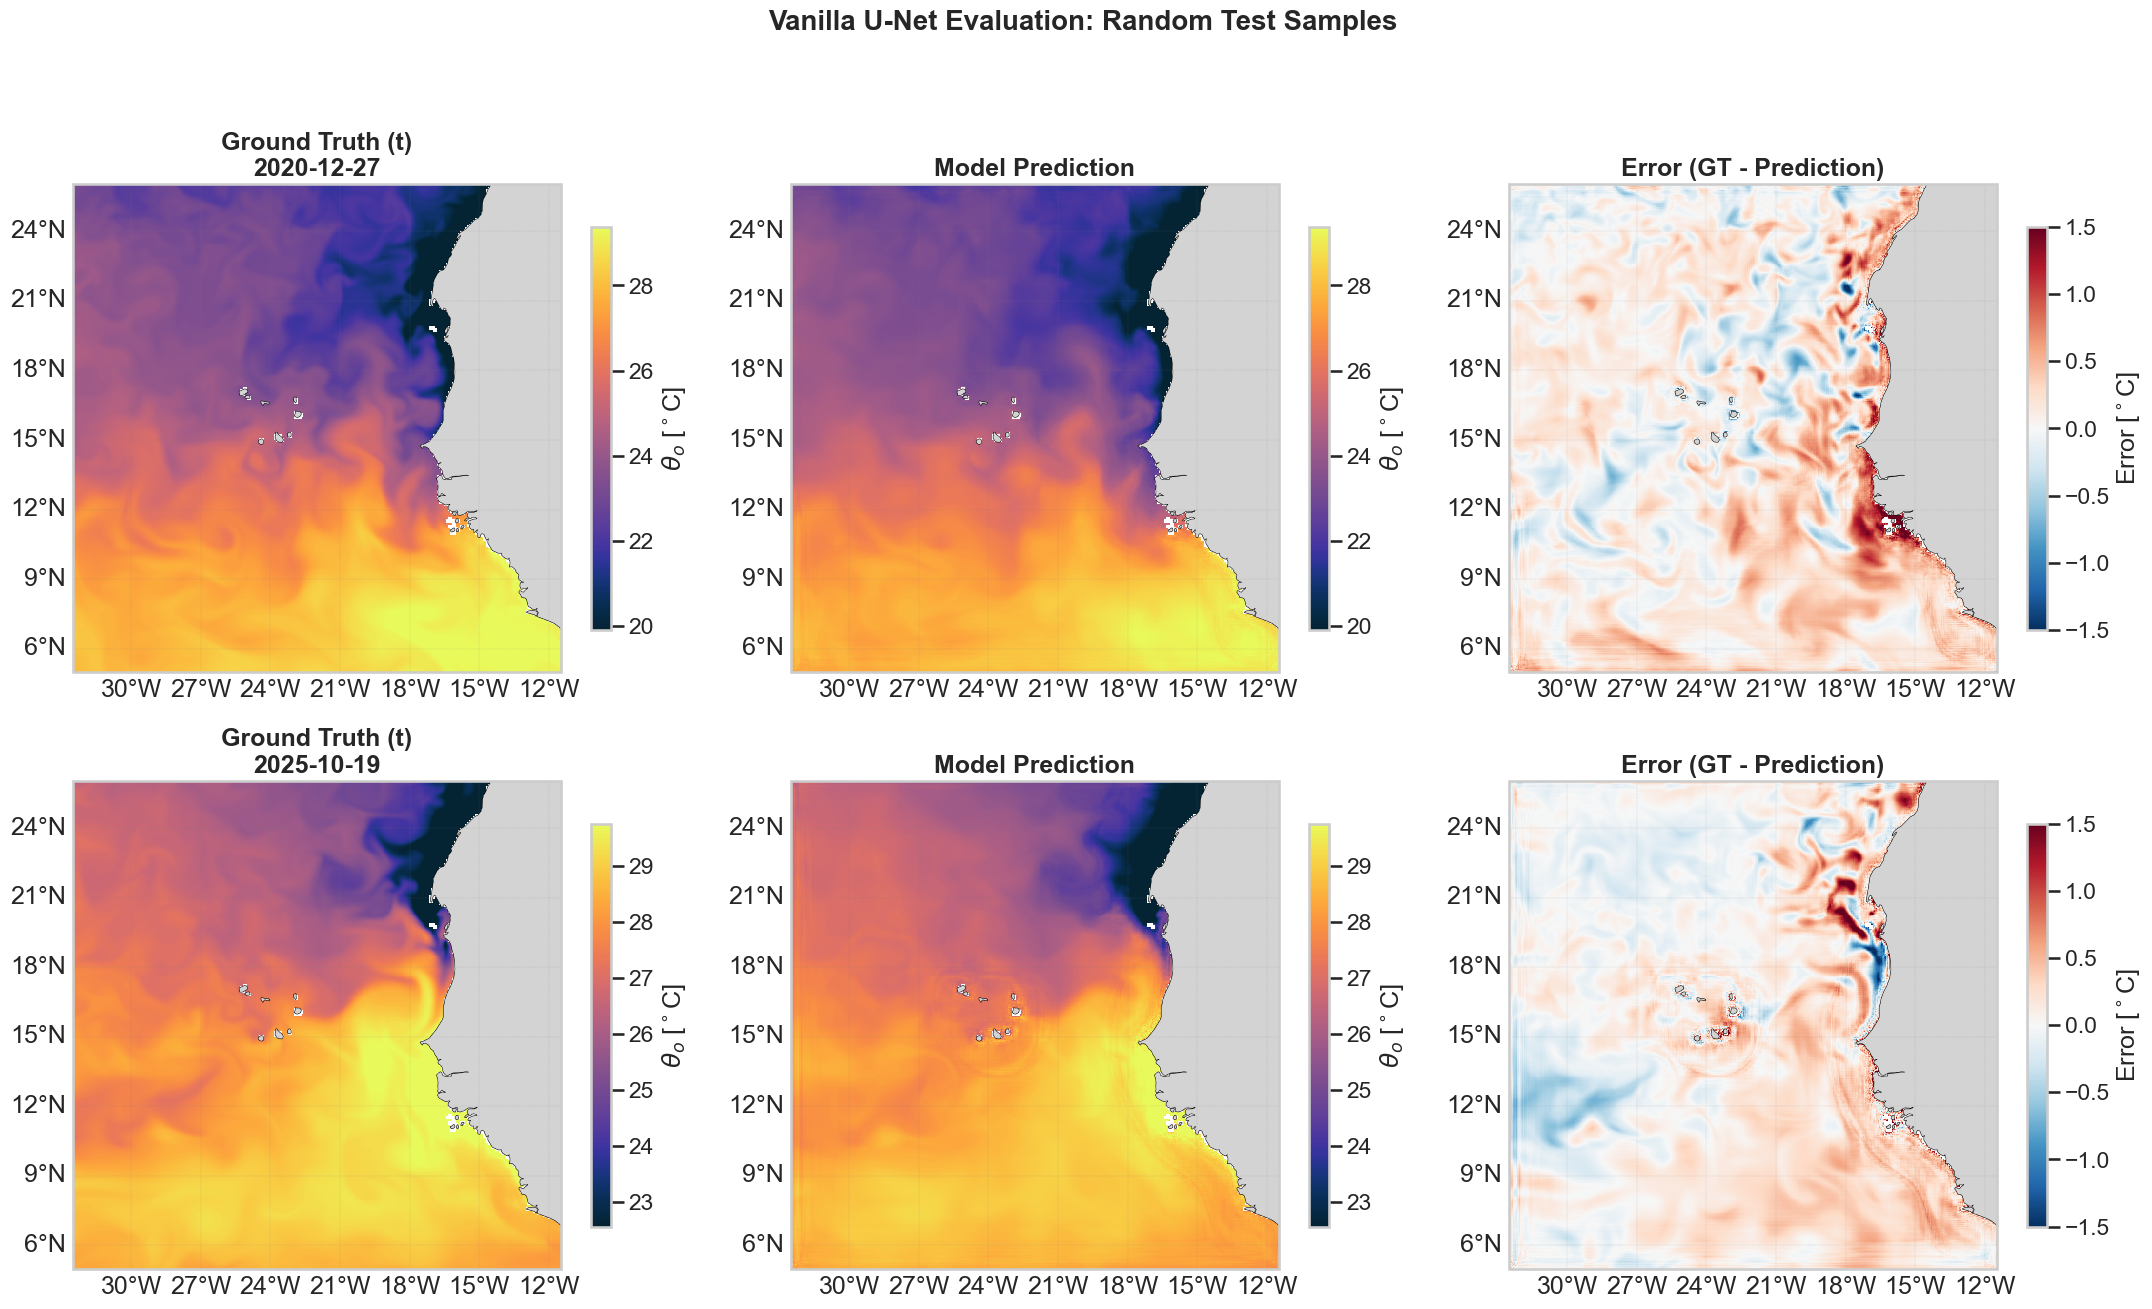

In [2]:
plot_training_history(file_paths_1['training'])
display_final_metrics(file_paths_1['metrics'])
plot_model_predictions(file_paths_1['predictions'])


### 3.2 Residual U-NET

In [ ]:
file_paths_2 = {
    'training':    os.path.join(RUNS_DIR, 'residual_unet', 'metrics.csv'),
    'metrics':     os.path.join(RUNS_DIR, 'residual_unet', 'final_metrics.csv'),
    'predictions': os.path.join(RUNS_DIR, 'residual_unet', 'predictions.nc'),
}


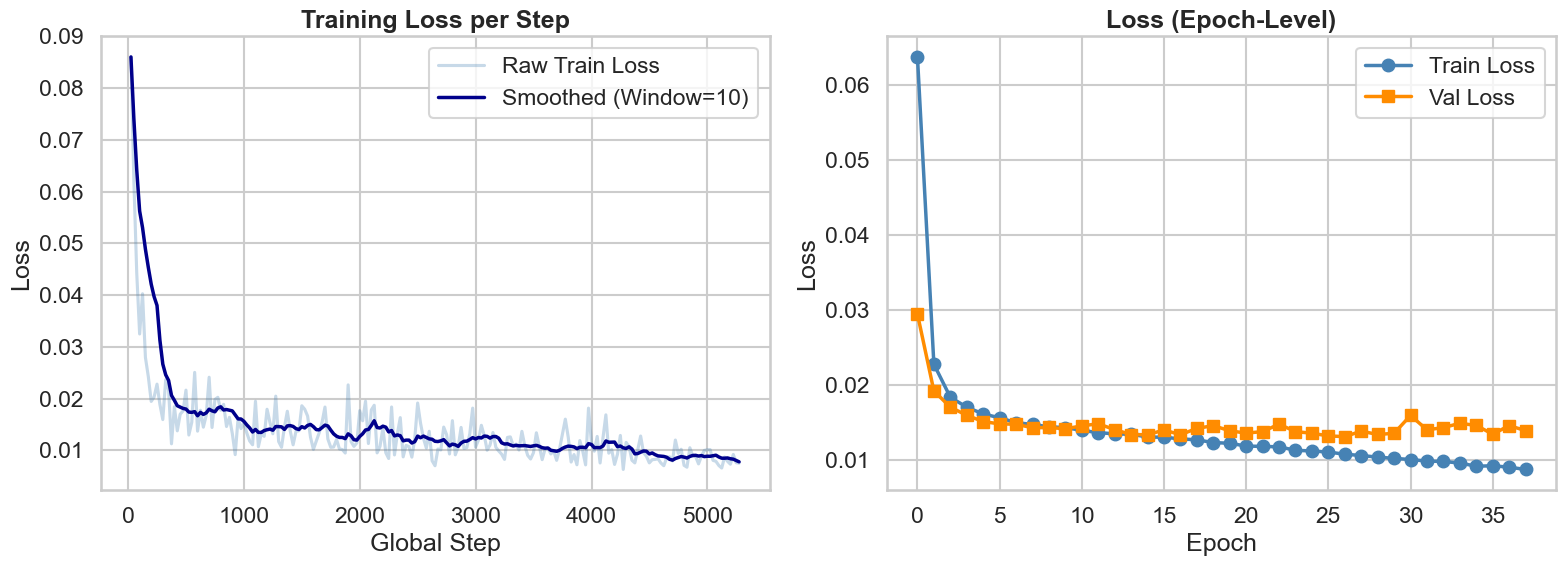

          FINAL EVALUATION METRICS           
norm_mse                  |          0.0131
norm_rmse                 |          0.1143
phys_mse                  |          0.0928
phys_rmse                 |          0.3046
n_samples                 |             271


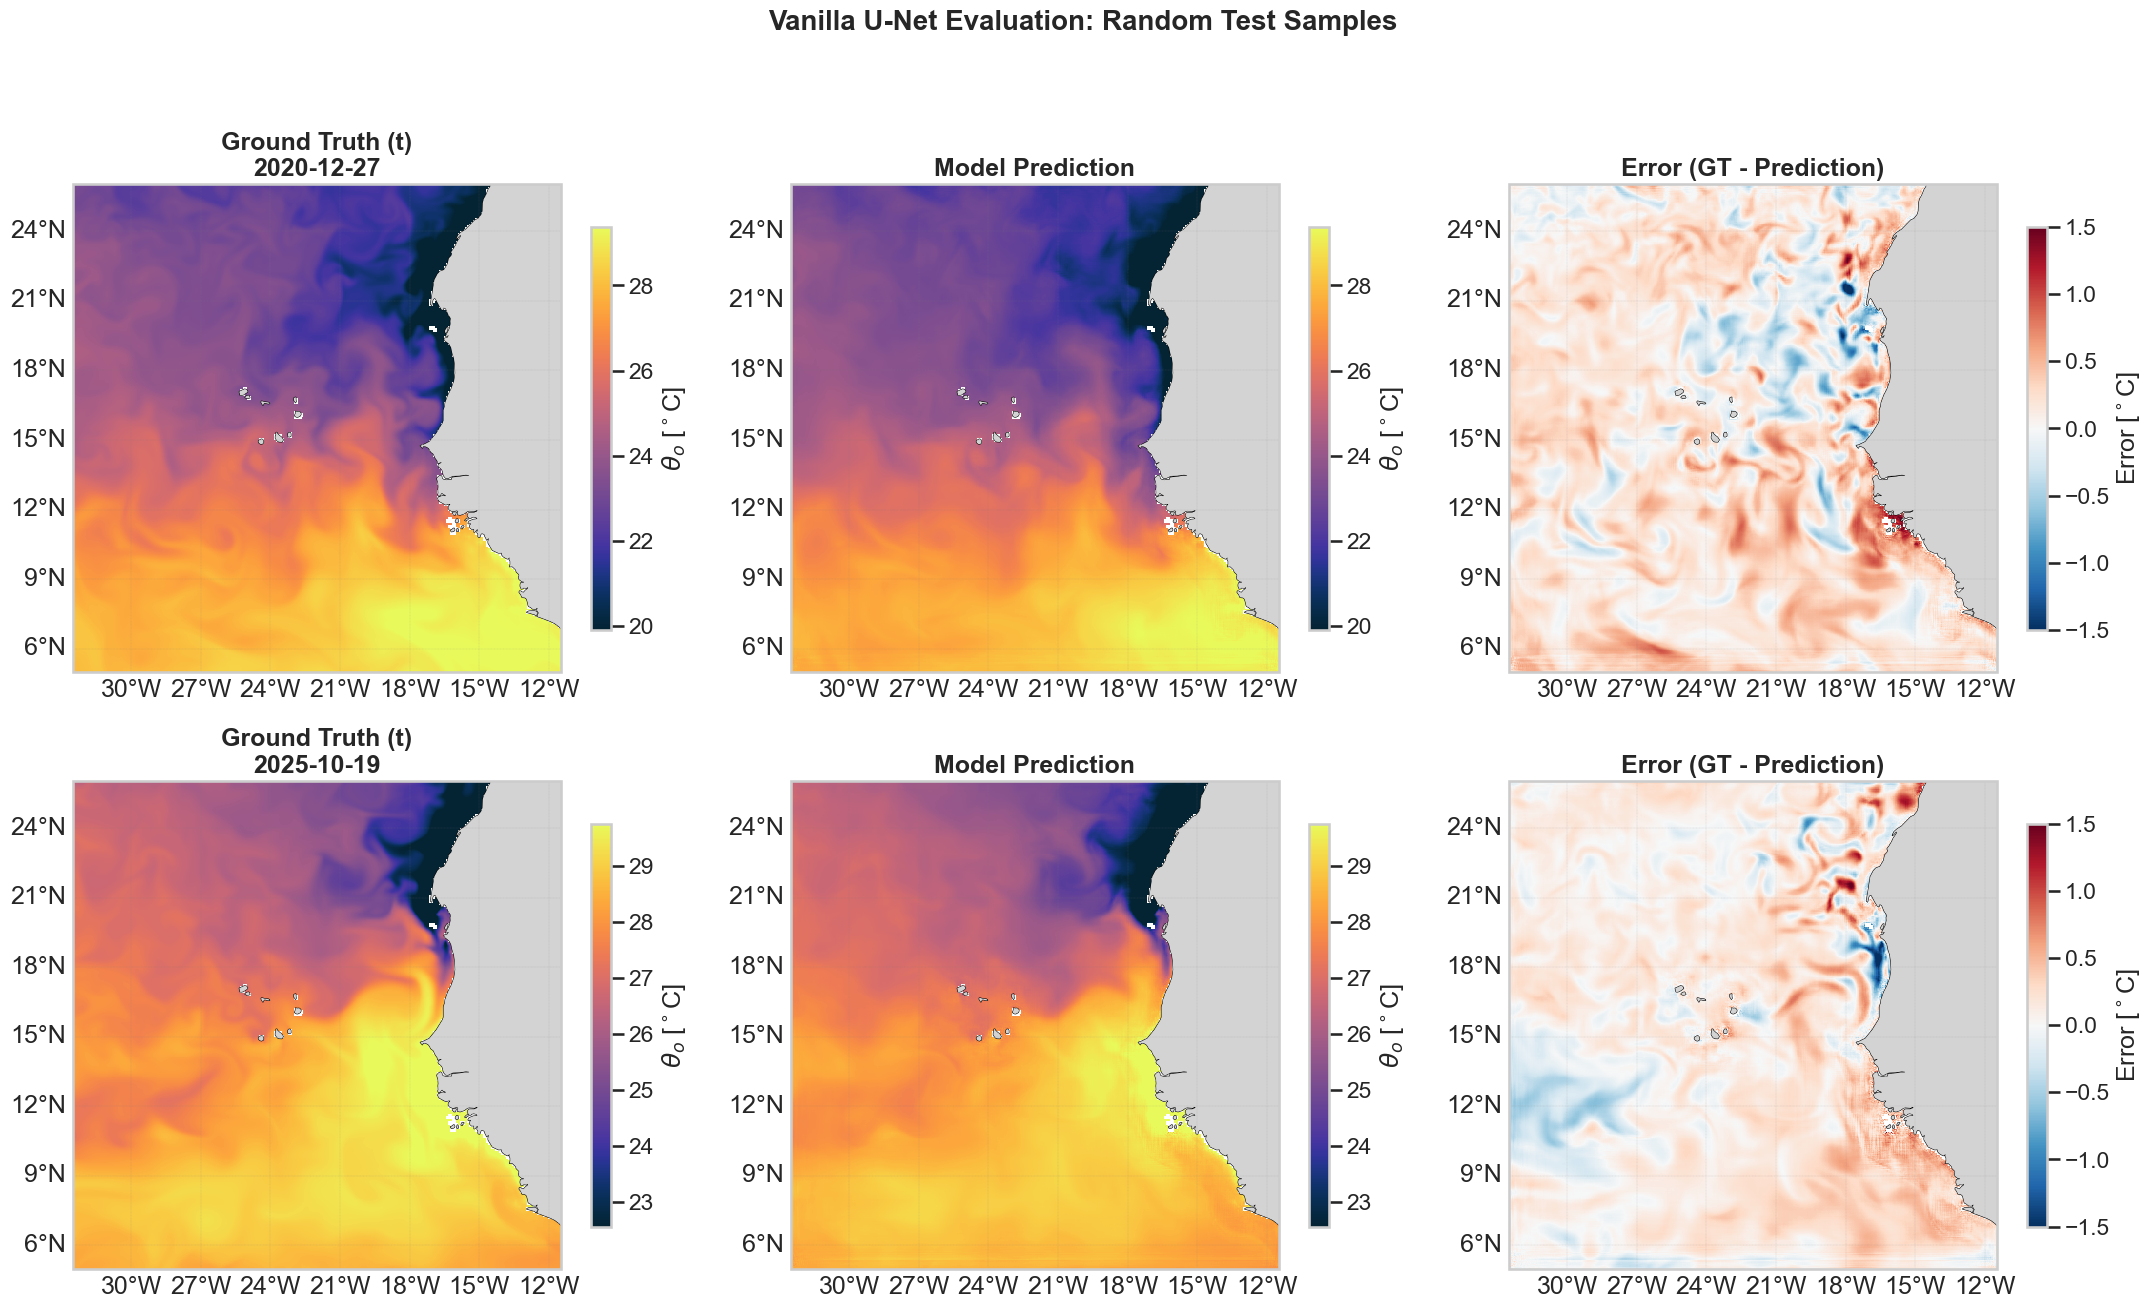

In [3]:
plot_training_history(file_paths_2['training'])
display_final_metrics(file_paths_2['metrics'])
plot_model_predictions(file_paths_2['predictions'])


### 3.3 Boundary Aware U-Net

In [ ]:
file_paths_3 = {
    'training':    os.path.join(RUNS_DIR, 'boundary_aware', 'metrics.csv'),
    'metrics':     os.path.join(RUNS_DIR, 'boundary_aware', 'final_metrics.csv'),
    'predictions': os.path.join(RUNS_DIR, 'boundary_aware', 'predictions.nc'),
}


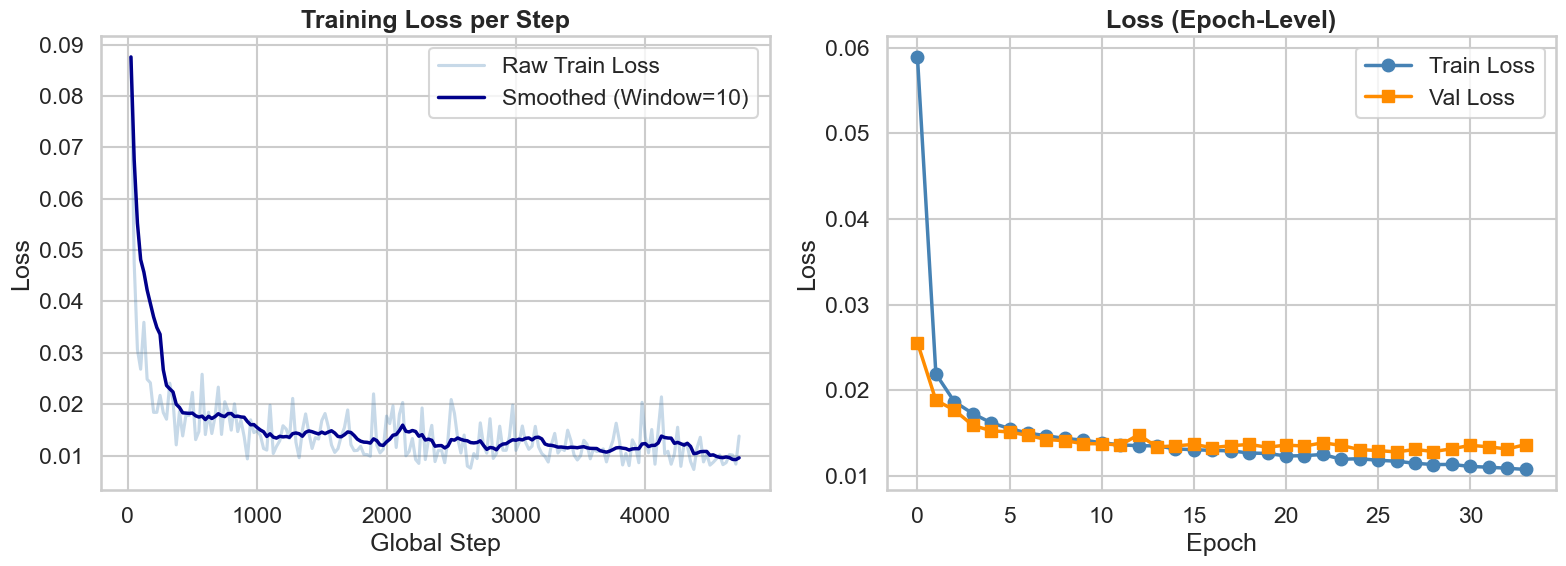

          FINAL EVALUATION METRICS           
norm_mse                  |          0.0128
norm_rmse                 |          0.1131
phys_mse                  |          0.0909
phys_rmse                 |          0.3014
n_samples                 |             271


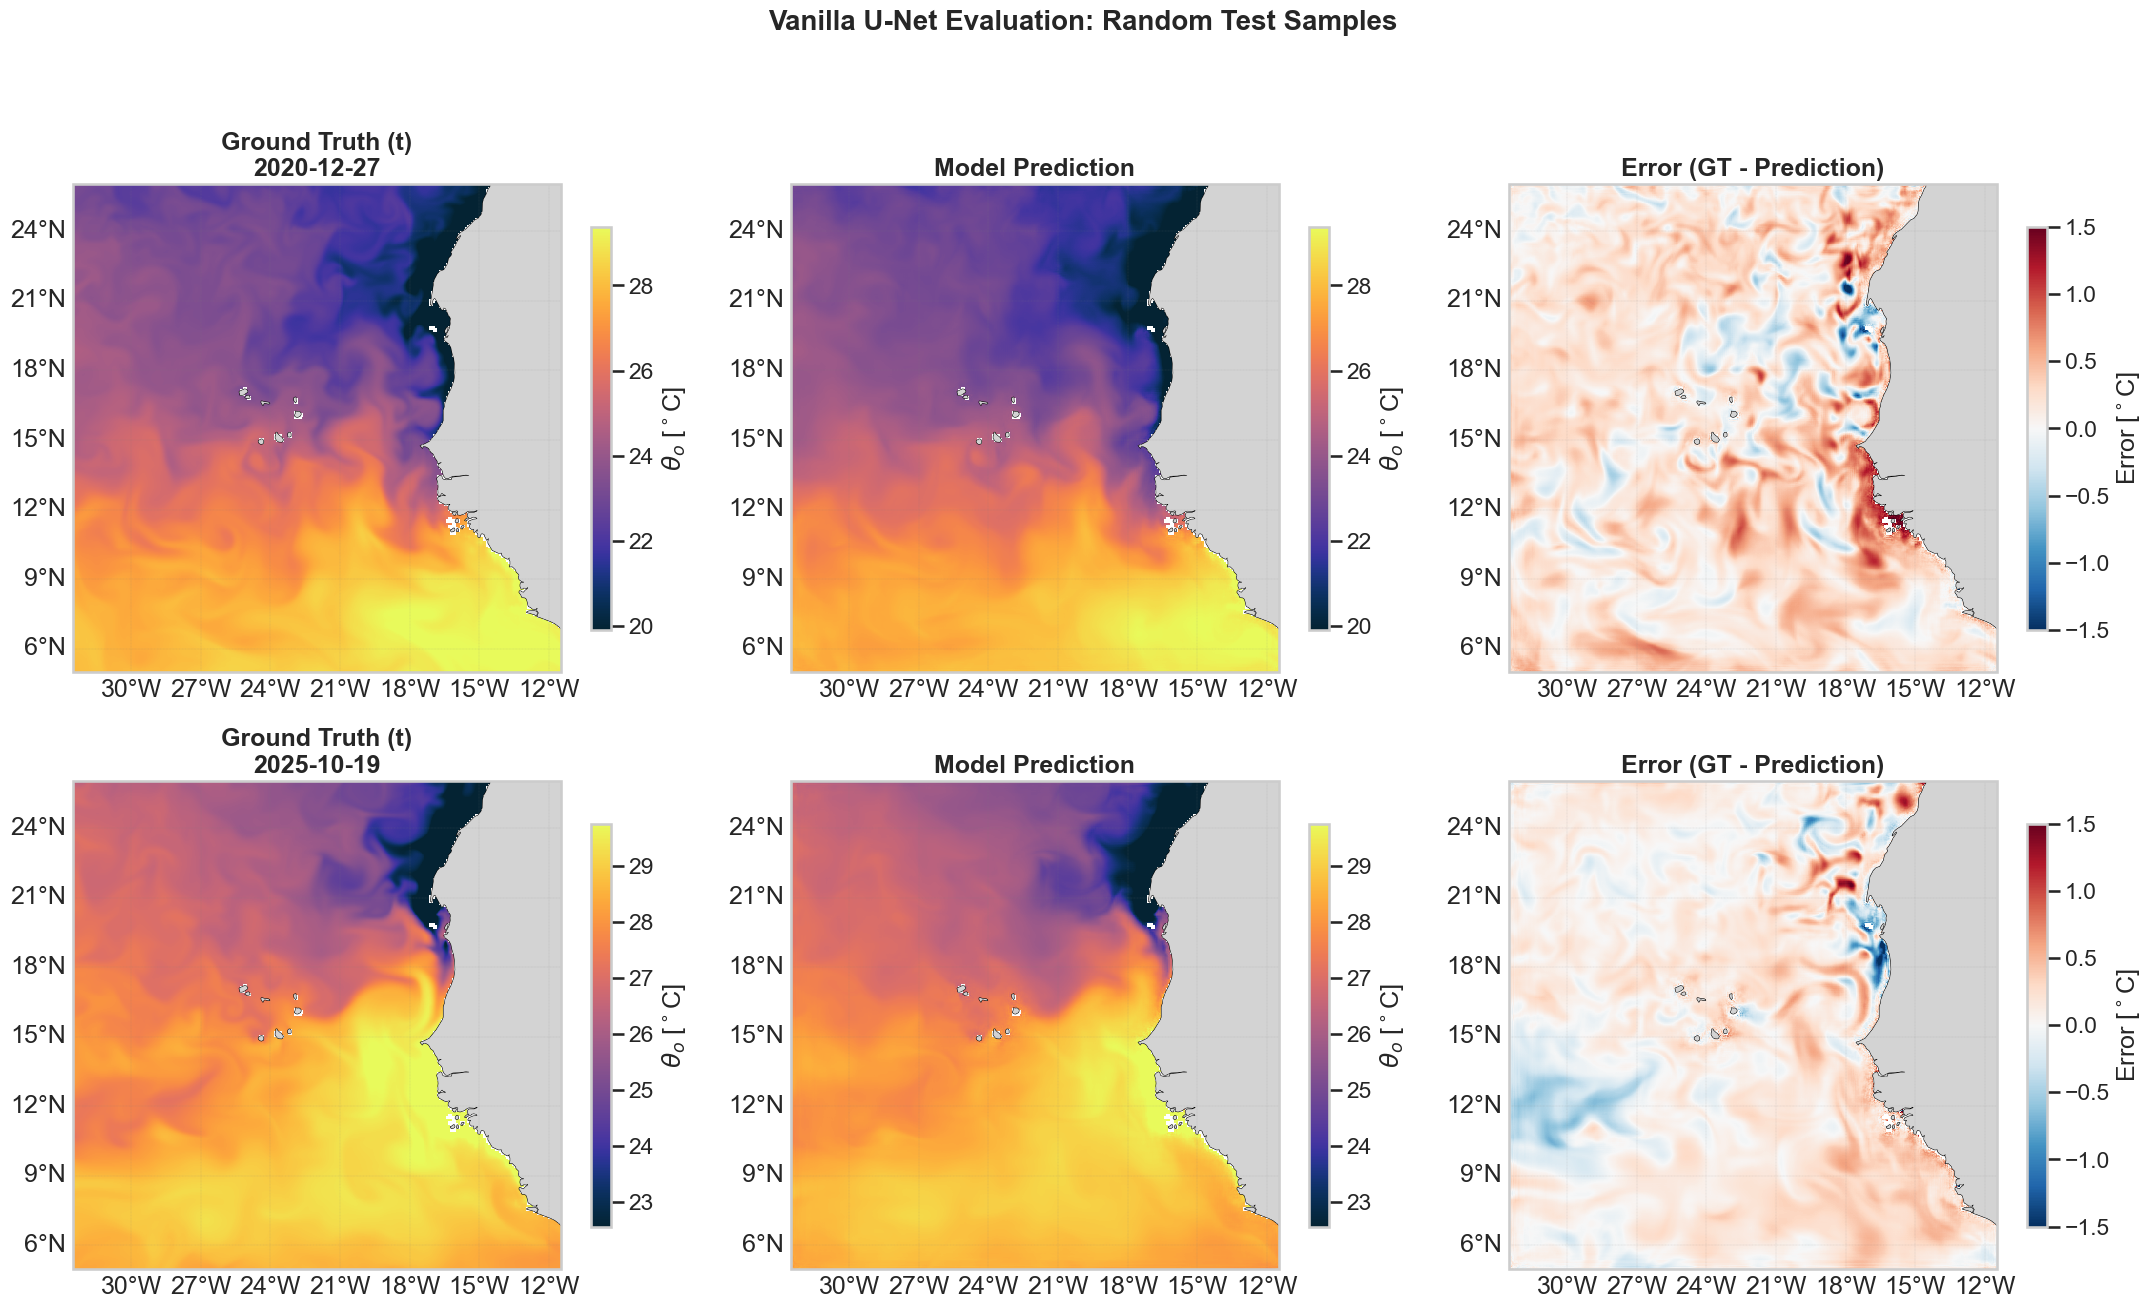

In [4]:
plot_training_history(file_paths_3['training'])
display_final_metrics(file_paths_3['metrics'])
plot_model_predictions(file_paths_3['predictions'])


### 3.4 Deep Residual U-Net

In [ ]:
file_paths_4 = {
    'training':    os.path.join(RUNS_DIR, 'deep_residual', 'metrics.csv'),
    'metrics':     os.path.join(RUNS_DIR, 'deep_residual', 'final_metrics.csv'),
    'predictions': os.path.join(RUNS_DIR, 'deep_residual', 'predictions.nc'),
}


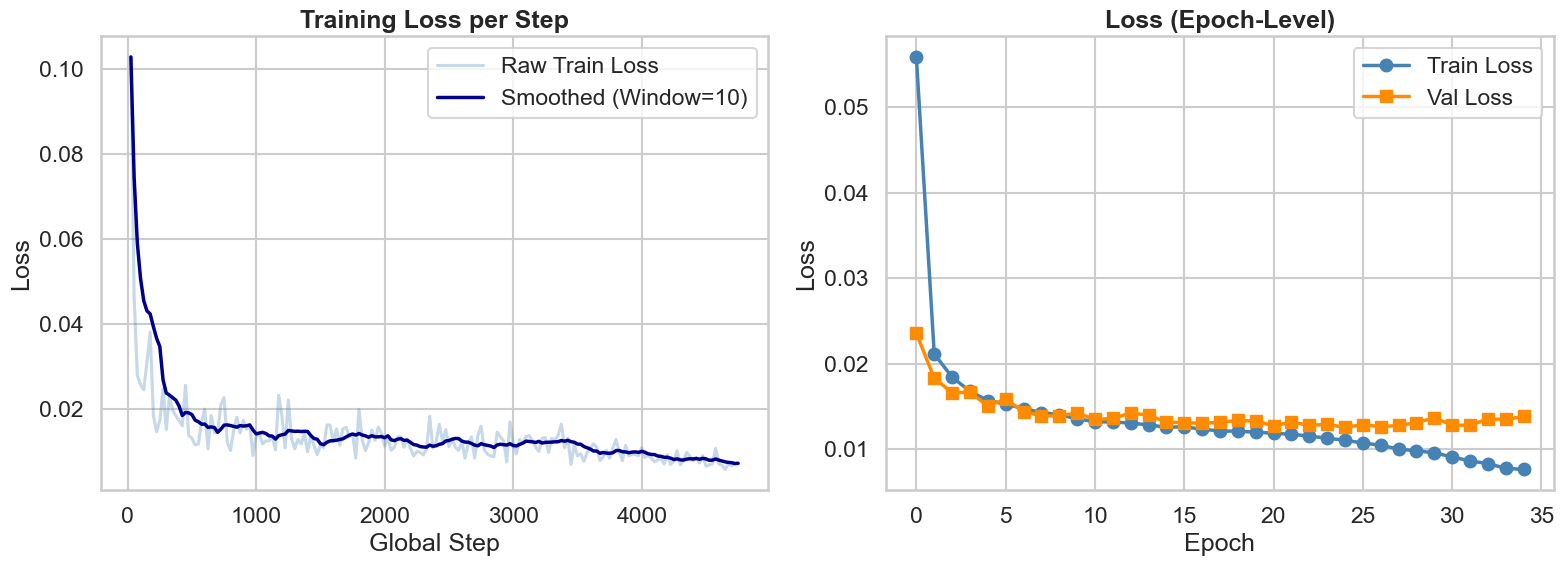

          FINAL EVALUATION METRICS           
norm_mse                  |          0.0126
norm_rmse                 |          0.1120
phys_mse                  |          0.0891
phys_rmse                 |          0.2985
n_samples                 |             271


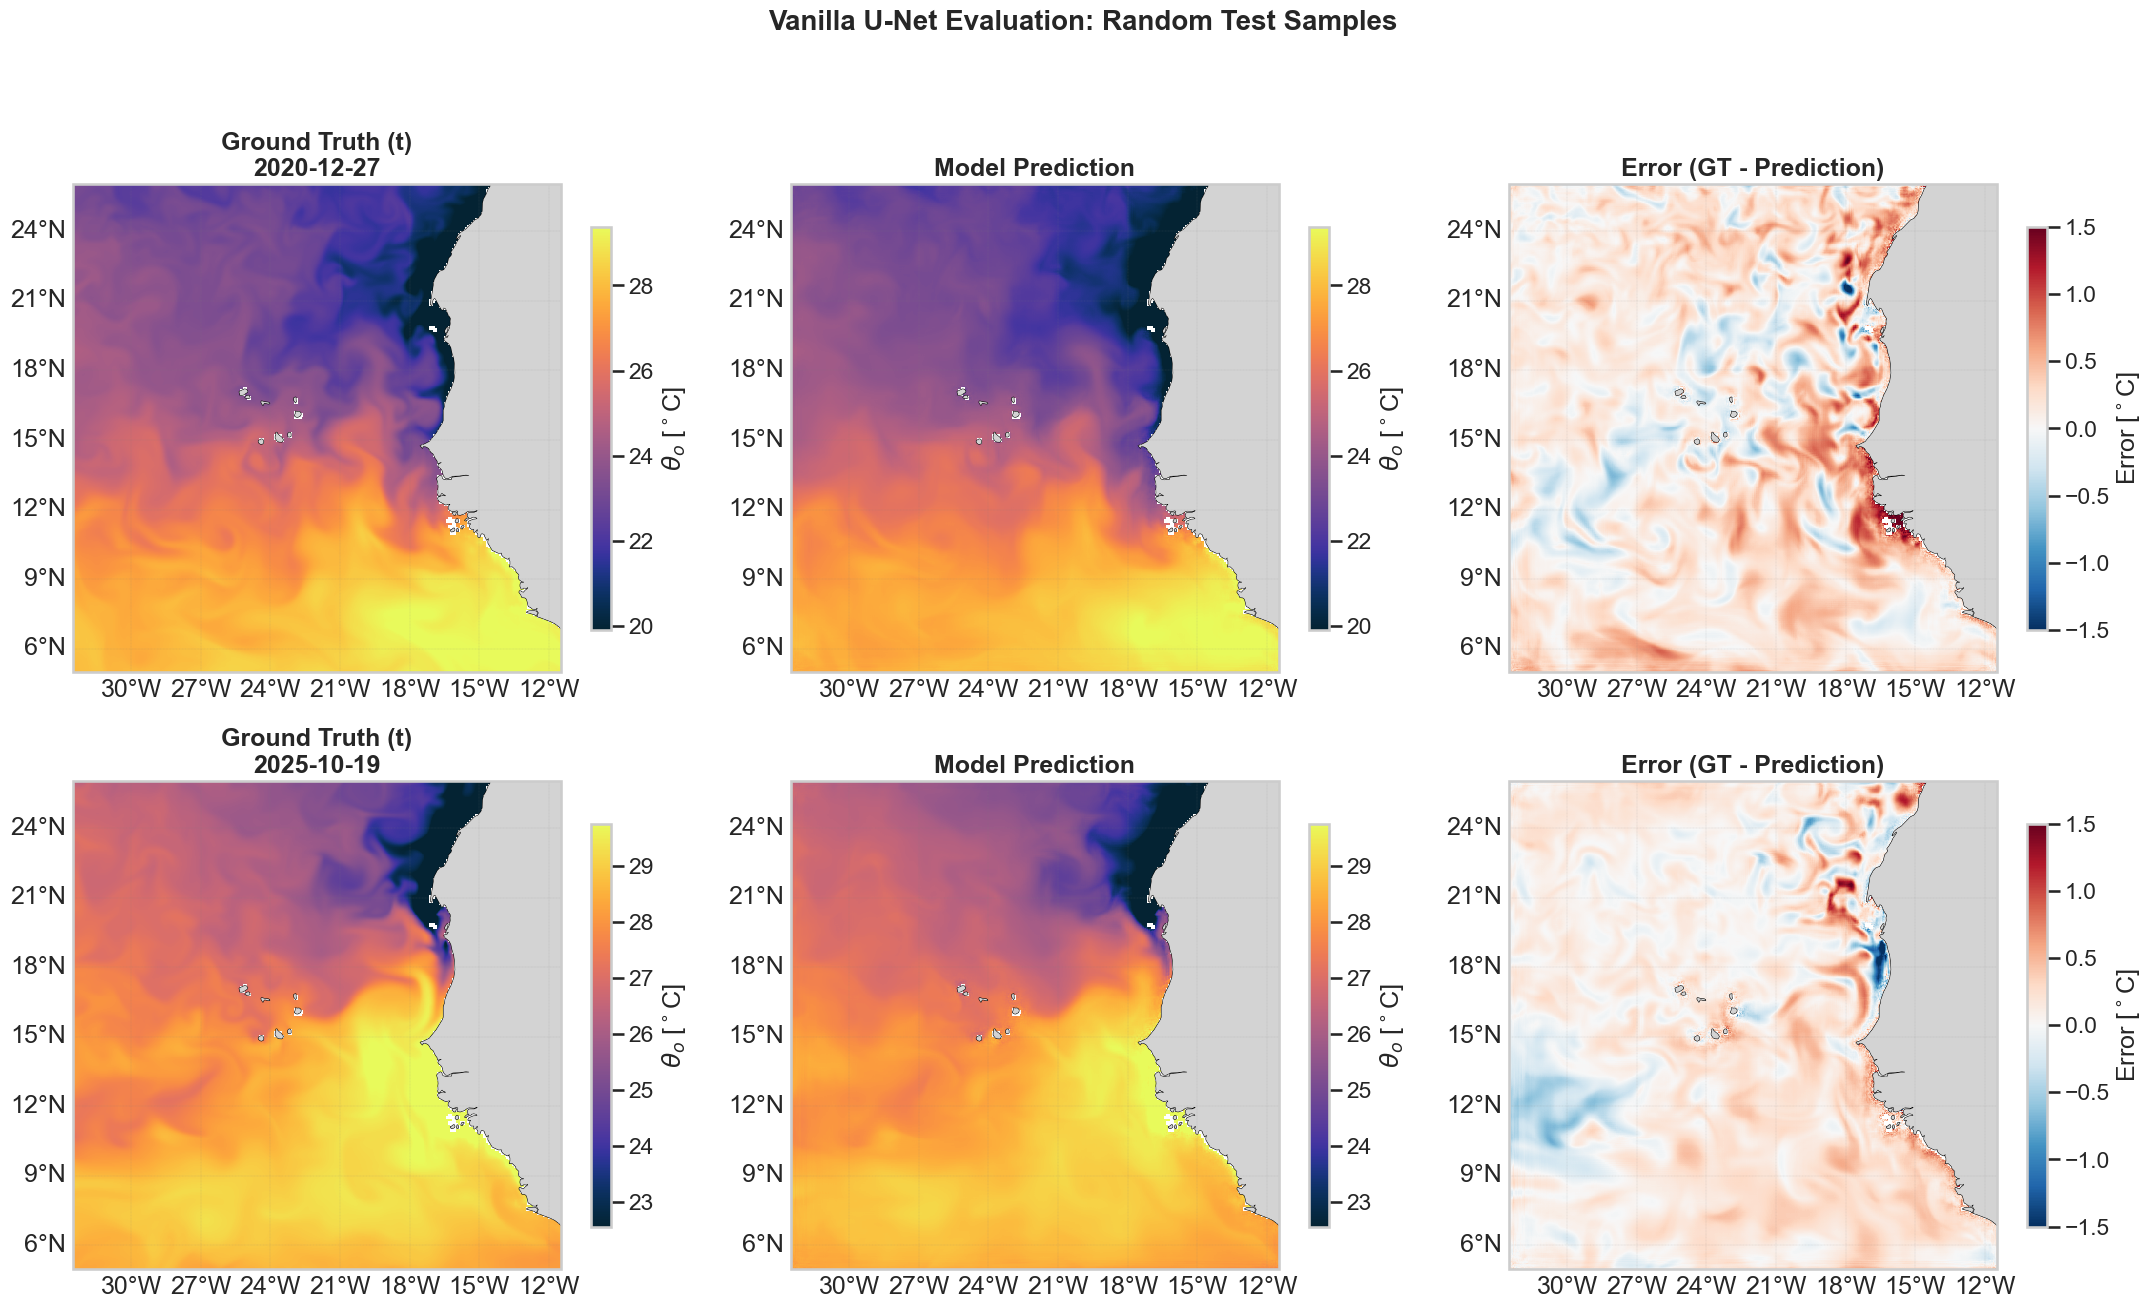

In [5]:
plot_training_history(file_paths_4['training'])
display_final_metrics(file_paths_4['metrics'])
plot_model_predictions(file_paths_4['predictions'])


## 4. Comparative Analysis

The table below summarizes the Root Mean Square Error (RMSE) for the baseline persistence model and the four architectural iterations of the U-Net.

| Model Version | RMSE (°C) | Improvement over Persistence |
| :--- | :---: | :---: |
| **Baseline Persistence** | 0.3698 | - |
| **Base U-Net** | 0.3179 | 14.0% |
| **Residual U-Net** | 0.3046 | 17.6% |
| **Boundary-Aware Residual** | 0.3014 | 18.5% |
| **Deep Residual U-Net** | **0.2985** | **19.3%** |

### 4.1 Discussion and Performance Insights

The results demonstrate a clear progression in predictive accuracy as structural refinements were introduced. All neural network iterations successfully outperformed the **Baseline Persistence** model. This confirms that the architectures are capturing meaningful physical dynamics rather than merely relying on the high temporal autocorrelation of Sea Surface Temperature (SST).

* **The Residual Shift:** Transitioning from direct prediction to **Residual** prediction yielded the most significant performance jump. By forcing the network to model only the delta ($\Delta SST$) between time steps, the kernels can focus exclusively on the advection and diffusion processes rather than the static background temperature.
* **Boundary Handling:** Upweighting pixels near the land-mask interface (**Boundary-Aware**) provided a marginal but consistent improvement. This indicates that complex interactions at the coastline—such as coastal upwelling—benefit from specialized weighting that standard convolutions might otherwise smooth over.
* **Architectural Depth:** The **Deep Residual** model achieved the highest accuracy. The additional hierarchical layer expanded the model's receptive field, allowing it to better contextualize local temperature shifts within larger mesoscale patterns.

Ultimately, the best-performing model achieved a **19.3% reduction in error** compared to the persistence baseline. While these results are promising for a 2D spatial architecture, the remaining error likely stems from the absence of additional physical variables (e.g., current velocities or mixed layer depth), which will be a primary focus of future project iterations.